# Assignment 2
In this assignment you will be working with three data files from iMDB:

cast.csv

release_dates.csv

titles.csv

Using the appropriate file(s), answer the following questions

Some questions can be completed with one-liners while others are a bit more involved

Where appropriate, answers should also provide brief commentary

Exclude data that doen't make senss, i.e. data from the future

Once complete upload this notebook to your classwork Github repo and post the link on Canvas

In [1]:
import pandas as pd

# Define input and output paths
files = {
    "data/title.basics.tsv": "data/title_sample.tsv",
    "data/title.principals.tsv": "data/cast_sample.tsv",
    "data/title.akas.tsv": "data/release_sample.tsv"
}

# Process each file
for input_path, output_path in files.items():
    df = pd.read_csv(input_path, sep="\t", nrows=500000) #read first 500,000 rows as pandas dataframe
    df.to_csv(output_path, sep="\t", index=False)
    print(f"Saved: {output_path}")


Saved: data/title_sample.tsv
Saved: data/cast_sample.tsv
Saved: data/release_sample.tsv


In [2]:
titles = pd.read_csv("data/title_sample.tsv", sep="\t")
cast = pd.read_csv("data/cast_sample.tsv", sep="\t")
release = pd.read_csv("data/release_sample.tsv", sep="\t")


In [3]:
# Q1: High level assessment
print("Titles info:")
titles.info()
print("\nCast info:")
cast.info()
print("\nRelease Dates info:")
release.info()

Titles info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          500000 non-null  object
 1   titleType       500000 non-null  object
 2   primaryTitle    500000 non-null  object
 3   originalTitle   500000 non-null  object
 4   isAdult         500000 non-null  int64 
 5   startYear       500000 non-null  object
 6   endYear         500000 non-null  object
 7   runtimeMinutes  500000 non-null  object
 8   genres          500000 non-null  object
dtypes: int64(1), object(8)
memory usage: 34.3+ MB

Cast info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   tconst      500000 non-null  object
 1   ordering    500000 non-null  int64 
 2   nconst      500000 non-null  object
 3  

In [4]:
# Sample 5 random records from each
print("🎬 Sample from Titles:")
print(titles.sample(5, random_state=42))

print("\n🎭 Sample from Cast:")
print(cast.sample(5, random_state=42))

print("\n📅 Sample from Release Dates:")
print(release.sample(5, random_state=42))

🎬 Sample from Titles:
           tconst titleType          primaryTitle         originalTitle  \
104241  tt0106651     movie        The Last Dance             Daibyônin   
199676  tt0208130     movie  Europa; il mio paese  Europa; il mio paese   
140199  tt0144563     movie       Racquel Untamed       Racquel Untamed   
132814  tt0136746     short     Canadian Carnival     Canadian Carnival   
408697  tt0426228     short  The Sound of Silence  The Sound of Silence   

        isAdult startYear endYear runtimeMinutes                    genres  
104241        0      1993      \N            116              Comedy,Drama  
199676        0      1962      \N             \N               Documentary  
140199        1      1990      \N             74                     Adult  
132814        0      1955      \N              8  Documentary,Family,Short  
408697        0      2004      \N              6        Comedy,Drama,Short  

🎭 Sample from Cast:
           tconst  ordering     nconst  cate

In [5]:
# Q2: Movies with title 'North by Northwest'
north_count = titles[titles['primaryTitle'] == 'North by Northwest'].shape[0]
print("Q2:", north_count)

Q2: 1


In [6]:
# Q3: Hamlet versions
hamlet = titles[titles['primaryTitle'] == 'Hamlet']
hamlet_versions = hamlet.shape[0]
hamlet_years = pd.to_numeric(hamlet['startYear'], errors='coerce')
print("Q3:", hamlet_versions, hamlet_years.min(), hamlet_years.max())

Q3: 51 1908 2005


In [7]:
# Q4: Treasure Island films sorted by year
treasure = titles[titles['primaryTitle'] == 'Treasure Island'].copy()
treasure['startYear'] = pd.to_numeric(treasure['startYear'], errors='coerce')
treasure_sorted = treasure.sort_values('startYear')[['primaryTitle', 'startYear']]
print("Q4:\n", treasure_sorted)

Q4:
            primaryTitle  startYear
2511    Treasure Island       1912
9584    Treasure Island       1917
11615   Treasure Island       1920
25449   Treasure Island       1934
28837   Treasure Island       1938
42304   Treasure Island       1950
406284  Treasure Island       1951
407030  Treasure Island       1957
229327  Treasure Island       1959
208113  Treasure Island       1960
57554   Treasure Island       1964
60096   Treasure Island       1966
479360  Treasure Island       1968
67825   Treasure Island       1972
161632  Treasure Island       1972
268317  Treasure Island       1973
361389  Treasure Island       1977
283665  Treasure Island       1978
312610  Treasure Island       1982
82601   Treasure Island       1982
88196   Treasure Island       1986
456866  Treasure Island       1987
98536   Treasure Island       1990
109290  Treasure Island       1993
269404  Treasure Island       1997
181257  Treasure Island       1997
175343  Treasure Island       1999
238004  Treasur

In [9]:
# Q5: Movies in 1950, 1980, 2000
titles['startYear'] = pd.to_numeric(titles['startYear'], errors='coerce')
movies = titles[titles['titleType'] == 'movie']
movies_1950 = movies[movies['startYear'] == 1950].shape[0]
movies_1980 = movies[movies['startYear'] == 1980].shape[0]
movies_2000 = movies[movies['startYear'] == 2000].shape[0]
print("Q5:", movies_1950, movies_1980, movies_2000)

Q5: 1661 2843 3677


In [10]:
# Q6: Cast size of Metropolis
metropolis_ids = titles[titles['primaryTitle'] == 'Metropolis']['tconst']
metropolis_cast = cast[cast['tconst'].isin(metropolis_ids)]
print("Q6:", metropolis_cast.shape[0])

Q6: 28


In [53]:
# Q7: Actor roles in 1950s and 1990s
cast = cast.merge(titles[['tconst', 'startYear']], on='tconst', how='left')
cast['startYear'] = pd.to_numeric(cast['startYear'], errors='coerce')
roles_1950s = cast[(cast['category'] == 'actor') & (cast['startYear'].between(1950, 1959))].shape[0]
roles_1990s = cast[(cast['category'] == 'actor') & (cast['startYear'].between(1990, 1999))].shape[0]
print("Q7:", roles_1950s, roles_1990s)

Q7: 313 29


NameError: name 'plt' is not defined

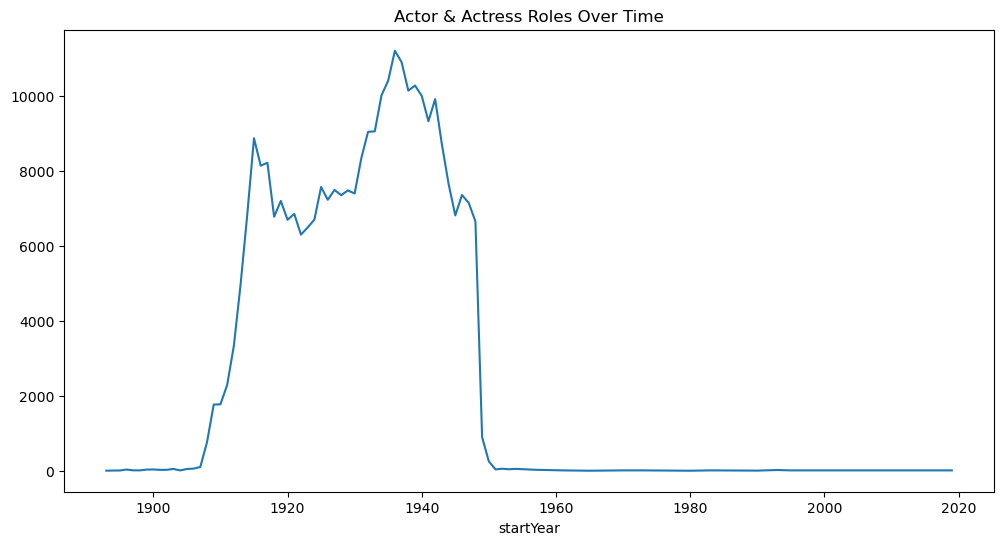

In [54]:
# Q8: Roles over time (actor/actress)
cast_filtered = cast[cast['category'].isin(['actor', 'actress'])]
roles_over_time = cast_filtered.groupby('startYear').size()
roles_over_time.plot(title='Actor & Actress Roles Over Time', figsize=(12, 6))
plt.ylabel("Role Count")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()

In [55]:
# Q9: Leading roles in 2000s
cast['decade'] = (cast['startYear'] // 10) * 10
leading_2000s = cast[(cast['decade'] == 2000) & (cast['ordering'] == 1)].shape[0]
print("Q9:", leading_2000s)

Q9: 1


In [56]:
# Q10: Roles with no ranking
no_rank_2000s = cast[(cast['decade'] == 2000) & (cast['ordering'].isna())].shape[0]
no_rank_1950s = cast[(cast['decade'] == 1950) & (cast['ordering'].isna())].shape[0]
print("Q10:", no_rank_2000s, no_rank_1950s)

Q10: 0 0


NameError: name 'plt' is not defined

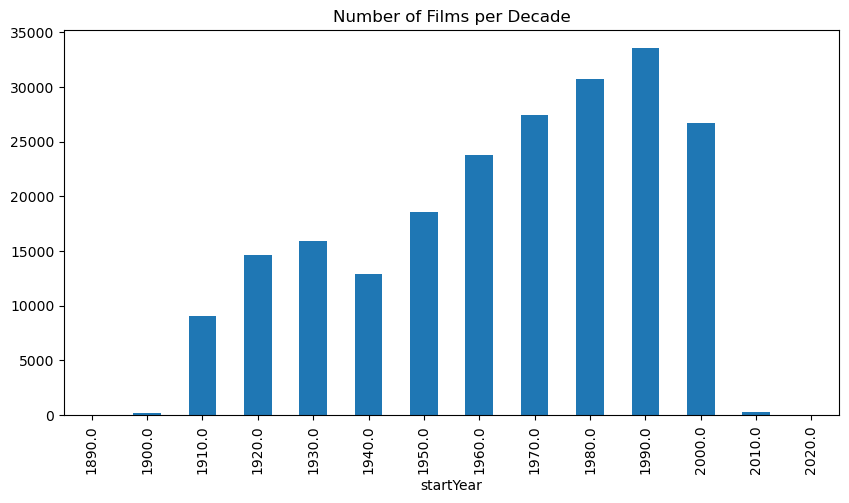

In [57]:
# Q11: Films per decade
films_by_decade = movies.groupby((movies['startYear'] // 10) * 10).size()
films_by_decade.plot(kind='bar', title='Number of Films per Decade', figsize=(10, 5))
plt.xlabel("Decade")
plt.ylabel("Film Count")
plt.grid(True)
plt.tight_layout()
plt.show()

In [58]:
# Q13: Top 10 character names
characters_cleaned = cast['characters'].dropna().astype(str).str.replace(r'[\[\]"]', '', regex=True).str.split(',')
top_characters = characters_cleaned.explode().str.strip().value_counts().head(10)
print("Q13:\n", top_characters)

Q13:
 characters
\N                   219928
Self                   1380
Undetermined Role       650
Narrator                621
Sheriff                 429
Henchman                326
Minor Role              315
Mary                    300
Joe                     253
Policeman               242
Name: count, dtype: int64


In [59]:
# Q14: Most films by actor in 1990s
cast_1990s = cast[(cast['startYear'] >= 1990) & (cast['startYear'] < 2000)]
top_actor_id = cast_1990s['nconst'].value_counts().idxmax()
print("Q14:", top_actor_id)

Q14: nm0000248


In [60]:
# Q15: Top 10 roles starting with 'Science'
science_roles = characters_cleaned.explode().str.strip()
science_roles = science_roles[science_roles.str.startswith("Science")]
print("Q15:\n", science_roles.value_counts().head(10))

Q15:
 Series([], Name: count, dtype: int64)


In [61]:
# Q16: Largest cast film
cast_counts = cast.groupby('tconst').size()
largest_cast_id = cast_counts.idxmax()
largest_cast_film = titles[titles['tconst'] == largest_cast_id][['primaryTitle', 'startYear']]
print("Q16:\n", largest_cast_film)

Q16:
                           primaryTitle  startYear
29062  Snow White and the Seven Dwarfs     1937.0


In [62]:
# Q17: Cast size descriptive stats
print("Q17:\n", cast_counts.describe())

Q17:
 count    39645.000000
mean        12.611931
std          5.302476
min          1.000000
25%          9.000000
50%         14.000000
75%         17.000000
max         39.000000
dtype: float64


In [63]:
# Q18/19: Natalie Portman film counts
natalie = cast[cast['primaryName'] == 'Natalie Portman'] if 'primaryName' in cast.columns else pd.DataFrame()
if not natalie.empty:
    natalie = natalie.merge(titles[['tconst', 'startYear']], on='tconst', how='left')
    print("Q18:\n", natalie.groupby('startYear').size())
    print("Q19:\n", natalie[natalie['ordering'].isin([1, 2])].groupby('startYear').size())

C:\Users\Divya Gunasekaran\AppData\Local\Temp\ipykernel_9200\239724880.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actor_roles['decade'] = (actor_roles['startYear'] // 10) * 10


NameError: name 'plt' is not defined

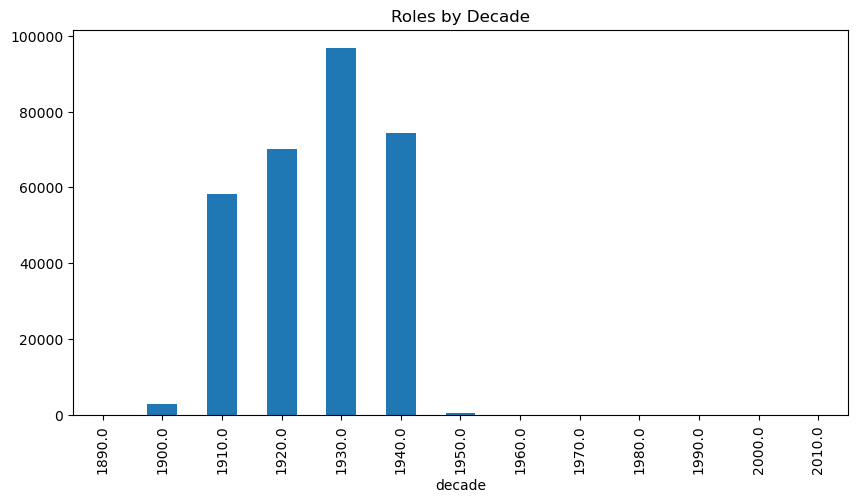

In [64]:
# Q20: Roles by decade
actor_roles = cast[cast['category'].isin(['actor', 'actress'])]
actor_roles['decade'] = (actor_roles['startYear'] // 10) * 10
roles_by_decade = actor_roles.groupby('decade').size()
roles_by_decade.plot(kind='bar', figsize=(10, 5), title='Roles by Decade')
plt.tight_layout()
plt.show()

In [65]:
# Q23: Films Star Wars actors appeared in
star_wars_titles = titles[titles['primaryTitle'].str.contains("Star Wars", na=False)]
sw_cast = cast[cast['tconst'].isin(star_wars_titles['tconst'])]
sw_actor_ids = sw_cast['nconst'].unique()
other_roles = cast[cast['nconst'].isin(sw_actor_ids)]
other_films = other_roles.merge(titles[['tconst', 'primaryTitle']], on='tconst', how='left')
other_films = other_films[~other_films['primaryTitle'].str.contains("Star Wars", na=False)]
print("Q23:\n", other_films['primaryTitle'].drop_duplicates().head(20))

Q23:
 Series([], Name: primaryTitle, dtype: object)
